# 多层感知机（MLP）

## 1. 概述

多层感知机（Multi-layer Perceptron, MLP）是一种前馈人工神经网络模型，由多个神经元层组成，包括输入层、隐藏层和输出层。每一层的神经元通过加权连接与下一层的神经元相连，并通过非线性激活函数引入非线性特性。MLP广泛应用于分类、回归和其他机器学习任务。

---

## 2. 基本结构

一个典型的MLP由以下几部分组成：

1. **输入层**：接收输入数据。
2. **隐藏层**：包含多个神经元，用于提取特征。
3. **输出层**：生成最终的预测结果。
4. **激活函数**：引入非线性特性，例如Sigmoid、ReLU或Tanh。
5. **权重和偏置**：控制神经元之间的连接强度。

---

## 3. 前向传播公式

假设我们有一个MLP，其输入为 $\mathbf{x} \in \mathbb{R}^d$，隐藏层有 $H$ 个神经元，输出层有 $K$ 个神经元。

### 3.1 输入到隐藏层
对于隐藏层的第 $j$ 个神经元，其计算公式为：
$$
z_j^{(1)} = \sum_{i=1}^d w_{ji}^{(1)} x_i + b_j^{(1)}
$$
其中：
- $w_{ji}^{(1)}$ 是从输入层第 $i$ 个神经元到隐藏层第 $j$ 个神经元的权重；
- $b_j^{(1)}$ 是隐藏层第 $j$ 个神经元的偏置；
- $z_j^{(1)}$ 是隐藏层第 $j$ 个神经元的加权输入。

经过激活函数后，隐藏层的输出为：
$$
a_j^{(1)} = f(z_j^{(1)})
$$
其中 $f(\cdot)$ 是激活函数。

### 3.2 隐藏层到输出层
对于输出层的第 $k$ 个神经元，其计算公式为：
$$
z_k^{(2)} = \sum_{j=1}^H w_{kj}^{(2)} a_j^{(1)} + b_k^{(2)}
$$
其中：
- $w_{kj}^{(2)}$ 是从隐藏层第 $j$ 个神经元到输出层第 $k$ 个神经元的权重；
- $b_k^{(2)}$ 是输出层第 $k$ 个神经元的偏置；
- $z_k^{(2)}$ 是输出层第 $k$ 个神经元的加权输入。

经过激活函数后，输出层的输出为：
$$
a_k^{(2)} = g(z_k^{(2)})
$$
其中 $g(\cdot)$ 是输出层的激活函数（例如Softmax用于分类任务，恒等函数用于回归任务）。

---

## 4. 反向传播算法

反向传播（Backpropagation）是训练MLP的核心算法，用于计算损失函数相对于每个参数的梯度。以下是推导过程。

### 4.1 损失函数
定义损失函数 $L$，通常使用均方误差（MSE）或交叉熵损失：
- MSE: $L = \frac{1}{2} \sum_{k=1}^K (y_k - a_k^{(2)})^2$
- 交叉熵: $L = -\sum_{k=1}^K y_k \log(a_k^{(2)})$

其中 $y_k$ 是目标值，$a_k^{(2)}$ 是预测值。

### 4.2 输出层的梯度
计算损失函数对输出层加权输入 $z_k^{(2)}$ 的梯度：
$$
\delta_k^{(2)} = \frac{\partial L}{\partial z_k^{(2)}} = \frac{\partial L}{\partial a_k^{(2)}} \cdot g'(z_k^{(2)})
$$
对于MSE：
$$
\frac{\partial L}{\partial a_k^{(2)}} = a_k^{(2)} - y_k
$$
对于交叉熵（Softmax激活）：
$$
\frac{\partial L}{\partial a_k^{(2)}} = a_k^{(2)} - y_k
$$

### 4.3 隐藏层的梯度
计算损失函数对隐藏层加权输入 $z_j^{(1)}$ 的梯度：
$$
\delta_j^{(1)} = \frac{\partial L}{\partial z_j^{(1)}} = f'(z_j^{(1)}) \sum_{k=1}^K \delta_k^{(2)} w_{kj}^{(2)}
$$

### 4.4 参数更新
根据梯度下降法更新权重和偏置：
$$
w_{ji}^{(1)} \leftarrow w_{ji}^{(1)} - \eta \frac{\partial L}{\partial w_{ji}^{(1)}}
$$
$$
b_j^{(1)} \leftarrow b_j^{(1)} - \eta \frac{\partial L}{\partial b_j^{(1)}}
$$
$$
w_{kj}^{(2)} \leftarrow w_{kj}^{(2)} - \eta \frac{\partial L}{\partial w_{kj}^{(2)}}
$$
$$
b_k^{(2)} \leftarrow b_k^{(2)} - \eta \frac{\partial L}{\partial b_k^{(2)}}
$$
其中 $\eta$ 是学习率。

---

## 5. 总结

MLP通过多层神经元和非线性激活函数，能够逼近任意复杂的函数关系。反向传播算法利用链式法则高效地计算梯度，使得MLP可以通过梯度下降法进行训练。尽管MLP在理论上具有强大的表达能力，但在实际应用中需要注意过拟合、梯度消失等问题。

---

好的，那我们来实现一下算法吧

我们先来看一下数据

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#导入数据集
data=np.loadtxt('xor_dataset.csv',delimiter=',')
print('数据集的大小为:',len(data))
print(data[:5])

#划分数据集
data=np.random.permutation(data)

ratio=0.8
split=int(ratio*len(data))
np.random.seed(0)
x_train,y_train=data[:split,:2],data[:split,2].reshape(-1,1)
x_test,y_test=data[split:,:2],data[split:,2].reshape(-1,1)


数据集的大小为: 1000
[[ 1.7641  0.4002  0.    ]
 [ 0.9787  2.2409  0.    ]
 [ 1.8676 -0.9773  1.    ]
 [ 0.9501 -0.1514  1.    ]
 [-0.1032  0.4106  1.    ]]


`raise`

 是 Python 中用于主动抛出异常的关键字。

`NotImplementedError `

是 Python 内置的一个异常类，表示某个方法或功能尚未实现。

---

这里使用基类的原因是因为每一层的感知机的参数是一致的，就是数量不同

所以我们用继承就行了

In [11]:
#基类
class Layer:
  #向前传播函数，根据输入x计算该层的输出y
  def forward(self,x):
    raise NotImplementedError
  #反向传播函数，输入上一层回传的梯度grad，输出当前层的梯度
  def backward(self,grad):
    raise NotImplementedError
  #跟新函数,用于更新当前层的参数
  def update(self,learning_rate):
    pass

解释一下参数
- `num_in` 输入维度
- `num_out` 输出维度
- `use_bias` 是否添加偏置

---

每一层的感知机

# 感知机的前向传播与反向传播

---

## 1. 参数维度说明

在感知机中，输入数据、权重、偏置等参数的维度如下：

- **输入数据**：$\mathbf{x} \in \mathbb{R}^{\text{batch\_size} \times \text{num\_in}}$
  - $\text{batch\_size}$：批次大小。
  - $\text{num\_in}$：输入特征的数量。

- **权重矩阵**：$\mathbf{W} \in \mathbb{R}^{\text{num\_in} \times \text{num\_out}}$
  - $\text{num\_out}$：输出神经元的数量。

- **偏置向量**：$\mathbf{b} \in \mathbb{R}^{1 \times \text{num\_out}}$

- **加权输入**：$\mathbf{y} \in \mathbb{R}^{\text{batch\_size} \times \text{num\_out}}$

---

## 2. 前向传播

### 2.1 计算公式

根据 `forward` 函数的实现，前向传播的过程如下：

1. **线性变换**：
   $$
   \mathbf{y} = \mathbf{x} \cdot \mathbf{W}
   $$
   - 维度：$\mathbf{y} \in \mathbb{R}^{\text{batch\_size} \times \text{num\_out}}$

2. **加偏置（如果使用偏置）**：
   $$
   \mathbf{y} = \mathbf{y} + \mathbf{b}
   $$
   - 维度：$\mathbf{y} \in \mathbb{R}^{\text{batch\_size} \times \text{num\_out}}$

3. **返回结果**：
   - 输出 $\mathbf{y}$ 的维度为 $(\text{batch\_size}, \text{num\_out})$。

---

## 3. 反向传播

### 3.1 梯度计算公式

反向传播的目标是根据损失函数 $L$ 的梯度 $\frac{\partial L}{\partial \mathbf{y}}$ 计算权重和偏置的梯度，并传播到前一层。

#### 1. 权重梯度
$$
\frac{\partial L}{\partial \mathbf{W}} = \frac{\mathbf{x}^\top \cdot \text{grad}}{\text{grad.shape}[0]}
$$
- 维度：$\frac{\partial L}{\partial \mathbf{W}} \in \mathbb{R}^{\text{num\_in} \times \text{num\_out}}$
- 其中：
  - $\mathbf{x}$ 是输入数据，维度为 $(\text{batch\_size}, \text{num\_in})$。
  - $\text{grad}$ 是从后一层传回的梯度，维度为 $(\text{batch\_size}, \text{num\_out})$。
  - 归一化因子 $\text{grad.shape}[0]$ 表示批次大小。

#### 2. 偏置梯度（如果使用偏置）
$$
\frac{\partial L}{\partial \mathbf{b}} = \text{mean}(\text{grad}, \text{axis}=0, \text{keepdims}=\text{True})
$$
- 维度：$\frac{\partial L}{\partial \mathbf{b}} \in \mathbb{R}^{1 \times \text{num\_out}}$
- 其中：
  - $\text{grad}$ 的维度为 $(\text{batch\_size}, \text{num\_out})$。
  - 对批次维度求均值，得到形状为 $(1, \text{num\_out})$。

#### 3. 向前传播的梯度
$$
\text{grad\_prev} = \text{grad} \cdot \mathbf{W}^\top
$$
- 维度：$\text{grad\_prev} \in \mathbb{R}^{\text{batch\_size} \times \text{num\_in}}$
- 其中：
  - $\mathbf{W}^\top$ 是权重矩阵的转置，维度为 $(\text{num\_out}, \text{num\_in})$。
  - $\text{grad}$ 的维度为 $(\text{batch\_size}, \text{num\_out})$。

---

### 3.2 参数更新

#### 1. 更新权重
$$
\mathbf{W} = \mathbf{W} - \eta \cdot \frac{\partial L}{\partial \mathbf{W}}
$$
- 其中 $\eta$ 是学习率。

#### 2. 更新偏置（如果使用偏置）
$$
\mathbf{b} = \mathbf{b} - \eta \cdot \frac{\partial L}{\partial \mathbf{b}}
$$
- 其中 $\eta$ 是学习率。

---


In [12]:
class Linear(Layer):
  def __init__(self,num_in,num_out,use_bias=True):
    self.num_in=num_in
    self.num_out=num_out
    self.use_bias=use_bias
    #【注意】 参数的初始化非常重要
    #如果把参数默认设置为0，会导致Wx=0,后续计算失去意义
    #我们直接采用正态分布来初始化参数
    self.W=np.random.normal(loc=0,scale=1.0,size=(num_in,num_out))  #loc表示均值，scale表示标准差
    if use_bias:
      self.b=np.zeros((1,num_out))
  def forward(self,x):
    #向前传播 y=xW+b
    #x的维度为(batch_size,num_in)
    self.x=x
    self.y=x@self.W
    if self.use_bias:
      self.y+=self.b
    return self.y
  def backward(self, grad):
    #反向传播,按照链式法则计算
    #grad的维度为(batch_size,num_out)
    #梯度要对batch取平均
    #grad_W的维度要和W相同,为(num_in,num_out)
    self.grad_W=self.x.T@grad/grad.shape[0]
    if self.use_bias:
      #grad_b的维度要和b相同为(1,num_out)
      self.grad_b=np.mean(grad,axis=0,keepdims=True)
    #向前传播的grad维度为(bach_size,num_in)
    grad=grad@self.W.T
    return grad
  def update(self, learning_rate):
    self.W-=learning_rate*self.grad_W
    if self.use_bias:
      self.b-=learning_rate*self.grad_b

In [21]:
class Identity(Layer):
    # 单位函数

    def forward(self, x):
        return x

    def backward(self, grad):
        return grad


class Sigmoid(Layer):  
    # 逻辑斯谛函数

    def forward(self, x):
        self.x = x
        self.y = 1 / (1 + np.exp(-x))
        return self.y
    
    def backward(self, grad):
        return grad * self.y * (1 - self.y)


class Tanh(Layer):
    # tanh函数

    def forward(self, x):
        self.x = x
        self.y = np.tanh(x)
        return self.y

    def backward(self, grad):
        return grad * (1 - self.y ** 2)


class ReLU(Layer):
    # ReLU函数

    def forward(self, x):
        self.x = x
        self.y = np.maximum(x, 0)
        return self.y

    def backward(self, grad):
        return grad * (self.x >= 0)


    
# 存储所有激活函数和对应名称，方便索引
activation_dict = { 
    'identity': Identity,
    'sigmoid': Sigmoid,
    'tanh': Tanh,
    'relu': ReLU
}

In [ ]:
class MLP:

    def __init__(
        self, 
        layer_sizes, # 包含每层大小的list
        use_bias=True, 
        activation='relu',
        out_activation='identity'
    ):
        self.layers = []
        num_in = layer_sizes[0]
        for num_out in layer_sizes[1: -1]:
            # 添加全连接层
            self.layers.append(Linear(num_in, num_out, use_bias)) 
            # 添加激活函数
            self.layers.append(activation_dict[activation]())   #()表示调用这个函数
            num_in = num_out
        # 由于输出需要满足任务的一些要求
        # 例如二分类任务需要输出[0,1]之间的概率值
        # 因此最后一层通常做特殊处理
        self.layers.append(Linear(num_in, layer_sizes[-1], use_bias))
        self.layers.append(activation_dict[out_activation]())
        
    def forward(self, x):
        # 前向传播，将输入依次通过每一层
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def backward(self, grad):
        # 反向传播，grad为损失函数对输出的梯度
        # 将该梯度依次回传，得到每一层参数的梯度
        for layer in reversed(self.layers):
            grad = layer.backward(grad)
            
    def update(self, learning_rate):
        # 更新每一层的参数
        for layer in self.layers:
            layer.update(learning_rate)

测试精度： 0.99


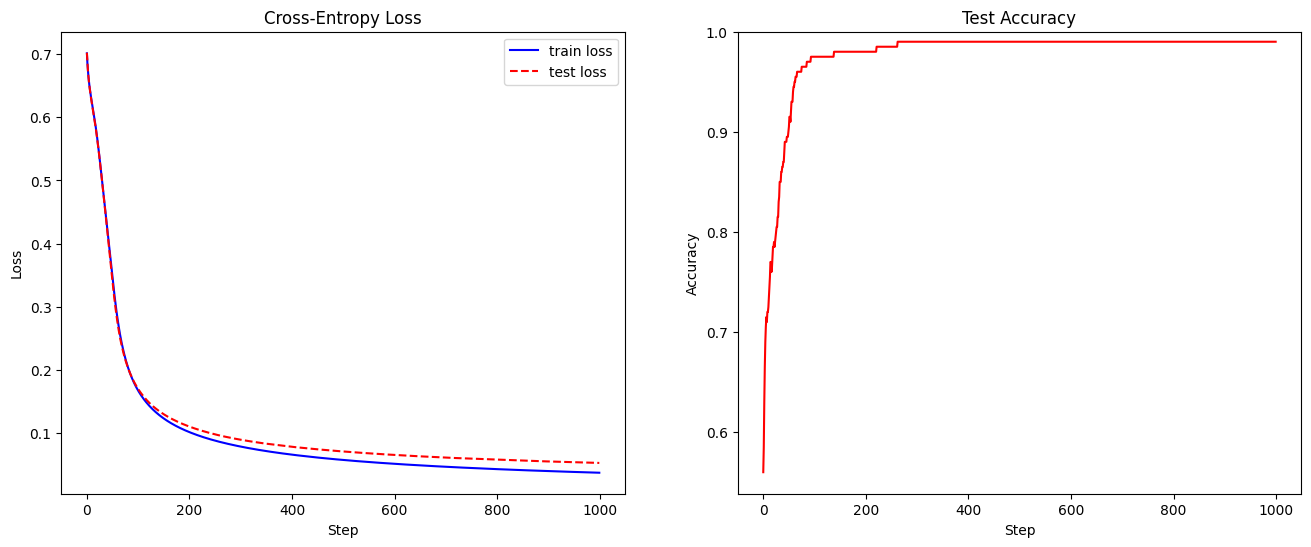

In [ ]:
# 设置超参数
num_epochs = 1000
learning_rate = 0.1
batch_size = 128
eps=1e-7 # 用于防止除以0、log(0)等数学问题

# 创建一个层大小依次为[2, 4, 1]的多层感知机
# 对于二分类任务，我们用sigmoid作为输出层的激活函数，使其输出在[0,1]之间
mlp = MLP(layer_sizes=[2, 4, 1], use_bias=True, out_activation='sigmoid')

# 训练过程
losses = []
test_losses = []
test_accs = []
for epoch in range(num_epochs):
    # 我们实现的MLP支持批量输入，因此采用SGD算法
    st = 0
    loss = 0.0
    while True:
        ed = min(st + batch_size, len(x_train))
        if st >= ed:
            break
        # 取出batch
        x = x_train[st: ed]
        y = y_train[st: ed]
        # 计算MLP的预测
        y_pred = mlp.forward(x)
        # 计算梯度∂J/∂y  
        grad = (y_pred - y) / (y_pred * (1 - y_pred) + eps)
        # 反向传播
        mlp.backward(grad)
        # 更新参数
        mlp.update(learning_rate)
        # 计算交叉熵损失
        train_loss = np.sum(-y * np.log(y_pred + eps) \
            - (1 - y) * np.log(1 - y_pred + eps))
        loss += train_loss
        st += batch_size

    losses.append(loss / len(x_train))
    # 计算测试集上的交叉熵和精度
    y_pred = mlp.forward(x_test)
    test_loss = np.sum(-y_test * np.log(y_pred + eps) \
        - (1 - y_test) * np.log(1 - y_pred + eps)) / len(x_test)
    test_acc = np.sum(np.round(y_pred) == y_test) / len(x_test)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    
print('测试精度：', test_accs[-1])
# 将损失变化进行可视化
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.plot(losses, color='blue', label='train loss')
plt.plot(test_losses, color='red', ls='--', label='test loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss')
plt.legend()

plt.subplot(122)
plt.plot(test_accs, color='red')
plt.ylim(top=1.0)
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.show()